# 0.0. Helper Functions

In [1]:
# exploratory data analysis
import pandas                 as pd
import numpy                  as np
import seaborn                as sns
# import matplotlib             as plt
import matplotlib.pyplot      as plt
import scikitplot             as skplt


# jupyter settings
from IPython.core.display     import HTML

# data extraction
# import pandas.io.sql          as psql
# import psycopg2               as pg

# from sqlalchemy               import create_engine, text
# from sqlalchemy_utils         import database_exists, create_database

# useless
# from postgre_credentials import *
import random
import xgboost as xgb
from sklearn.preprocessing   import MinMaxScaler
from sklearn.linear_model    import LogisticRegression
from category_encoders.count import CountEncoder
from sklearn.model_selection import train_test_split
from sklearn                 import metrics as mt
from sklearn.neighbors       import KNeighborsClassifier
from category_encoders       import TargetEncoder
from sklearn.preprocessing   import RobustScaler
from sklearn.preprocessing   import StandardScaler
from sklearn.ensemble        import GradientBoostingClassifier

from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, label_ranking_average_precision_score
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV

from tabulate                import tabulate

In [2]:
def psycopg_connect():
    """"" Creates a psycopg connection from file postgre_credentials """""
    conn = pg.connect(    user = username,
                          password = pwd,
                          host = host,
                          port = port,
                          database = database)
    return conn

def jupyter_settings():
    """ Optimize general settings, standardize plot sizes, etc. """
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [12, 6]
    plt.rcParams['font.size'] = 12
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    pd.set_option('display.max_columns', 30)
    pd.set_option('display.max_rows', 30)
jupyter_settings()

def subplots_adjust():
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    return None


# def metrics(y_test, y_predict,yhat_proba):

#     accuracy_score  = mt.accuracy_score(y_test, y_predict)
#     precision_score = mt.precision_score(y_test, y_predict, labels=1, zero_division=1)
#     recall_score    = mt.recall_score(y_test, y_predict)
#     f1_score        = mt.f1_score(y_test, y_predict)

#     print(f'Acurácia: {accuracy_score}')
#     print(f'Precisão: {precision_score}')
#     print(f'Recall:   {recall_score}')
#     print(f'F1 Score: {f1_score}')

#     skplt.metrics.plot_cumulative_gain(y_test, yhat_proba)
    
#     return None

def dataframe_metrics(X_test, y_test, yhat_proba, k=0.4):
    df_prob = X_test.copy()
    df_prob['response'] = y_test
    df_prob['prob_0'] = yhat_proba[:,0]
    df_prob['prob_1'] = yhat_proba[:,1]
    df_prob = df_prob.sort_values(by='prob_1', ascending=False)
    df_prob = df_prob.reset_index(drop=True)
    df_prob['1_at_k'] = df_prob['response'].cumsum()
    df_prob['recall_at_k'] = df_prob['1_at_k']/df_prob['response'].sum()
    df_prob['row'] = df_prob.index.values + 1
    df_prob['base_at_k'] = df_prob['row'] / len(df_prob)
    
    recall_at_k = df_prob.loc[ int(len(df_prob) * 0.4) , 'recall_at_k']
    
    print(f'O recall para {k*100}% da base é de: {recall_at_k:2f}')
    
    
    return None

def recall_at_k(X_test, y_test, yhat_proba, k=0.4):
    df_prob                = X_test.copy()
    df_prob['response']    = y_test
    df_prob['prob_0']      = yhat_proba[:,0]
    df_prob['prob_1']      = yhat_proba[:,1]
    df_prob                = df_prob.sort_values(by='prob_1', ascending=False)
    df_prob                = df_prob.reset_index(drop=True)
    df_prob['1_at_k']      = df_prob['response'].cumsum()
    df_prob['recall_at_k'] = df_prob['1_at_k']/df_prob['response'].sum()
    df_prob['row']         = df_prob.index.values + 1
    df_prob['base_at_k']   = df_prob['row'] / len(df_prob)
    
    recall_at_k = df_prob.loc[ int(len(df_prob) * k) , 'recall_at_k']
    
    return recall_at_k

def metrics(X_test, y_test, yhat_proba, y_predict, k=0.4):
    df_prob                = X_test.copy()
    df_prob['response']    = y_test
    df_prob['prob_0']      = yhat_proba[:,0]
    df_prob['prob_1']      = yhat_proba[:,1]
    df_prob                = df_prob.sort_values(by='prob_1', ascending=False)
    df_prob                = df_prob.reset_index(drop=True)
    df_prob['1_at_k']      = df_prob['response'].cumsum()
    df_prob['recall_at_k'] = df_prob['1_at_k']/df_prob['response'].sum()
    df_prob['row']         = df_prob.index.values + 1
    df_prob['base_at_k']   = df_prob['row'] / len(df_prob)
    
    skplt.metrics.plot_cumulative_gain(y_test, yhat_proba)
    
    recall_at_k = df_prob.loc[ int(len(df_prob) * k) , 'recall_at_k']
    accuracy_score  = mt.accuracy_score(y_test, y_predict)
    precision_score = mt.precision_score(y_test, y_predict, labels=1, zero_division=1)
    recall_score    = mt.recall_score(y_test, y_predict)
    f1_score        = mt.f1_score(y_test, y_predict)

#     print(f'Recall at 40%: {recall_at_k}')    
#     print(f'Acurácia: {accuracy_score}')
#     print(f'Precisão: {precision_score}')
#     print(f'Recall:   {recall_score}')
#     print(f'F1 Score: {f1_score}')


    return recall_at_k,accuracy_score,precision_score,recall_score,f1_score

# 1.0 Loading Data

## 1.1 Database - Credentials & Connector 

In [3]:
# # Credentials
# host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com'
# port = '5432'
# database = 'comunidadedsdb'
# username = 'member'
# pwd = 'cdspa'

# # Connector
# conn = pg.connect( user=username,
#                    password=pwd,
#                    host=host,
#                    port=port,
#                    database=database)

## 1.2 Data Collection - Tables and Schema Query

In [4]:
# # psycopg_connect()

# engine = create_engine('postgresql://'+username+':'+pwd+'@'+host+':'+port+'/'+database+'')

# with engine.begin() as conn: 
#     #select tables from schema
#     query_tables = "SELECT * FROM information_schema.tables WHERE table_schema = 'pa004'"
#     df_tables = pd.read_sql( text(query_tables) , conn )

#     # users
#     query_users = """SELECT * FROM pa004.users """
#     df_users = pd.read_sql( text(query_users) , conn )
    
#     # insurance
#     query_insurance = """SELECT * FROM pa004.insurance """
#     df_insurance = pd.read_sql( text(query_insurance) , conn )

#     # vehicle
#     query_vehicle = """SELECT * FROM pa004.vehicle """
#     df_vehicle = pd.read_sql( text(query_vehicle) , conn )

#     #build raw dataset:
#     query_raw = """
#     SELECT *
#     FROM pa004.users u 
#     INNER JOIN pa004.vehicle v on u.id = v.id 
#     INNER JOIN pa004.insurance i ON u.id = i.id
#     ORDER BY u.id
#     """
#     df_raw = pd.read_sql( text(query_raw) , conn )

## 1.3 Creating the main DataFrame - df_raw

In [5]:
# # creating df_raw
# df_raw = df_raw.loc[:,~df_raw.columns.duplicated()]
# df_raw.head()

In [6]:
# df_raw.to_csv('df_raw.csv', index=False)

In [7]:
df_raw = pd.read_csv('./dataset/df_raw.csv')

# 2.0 Data Description

In [8]:
df2 = df_raw.copy()

## 2.1 Rename Columns 

In [9]:
df2 = df2.rename(columns = {'vintage':'days_associated'})

## 2.2 Data Dimensions 

In [10]:
print(f'Linhas: {df2.shape[0]}')
print(f'Colunas: {df2.shape[1]}')

Linhas: 381109
Colunas: 12


## 2.3 Data Types

In [11]:
df2.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
driving_license           int64
vehicle_age              object
vehicle_damage           object
previously_insured        int64
annual_premium          float64
days_associated           int64
response                  int64
dtype: object

## 2.4 Check NA

In [12]:
df2.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
driving_license         0
vehicle_age             0
vehicle_damage          0
previously_insured      0
annual_premium          0
days_associated         0
response                0
dtype: int64

## 2.5 Fillout NA

In [13]:
# Não há nulos no dataset

## 2.6 Change types

In [14]:
# to object
df2['id'] = df2['id'].astype('object')

# to int
df2[['policy_sales_channel','region_code']] = df2[['policy_sales_channel','region_code']].astype('int64')

## 2.7 Descriptive Statistical

In [15]:
num_attributes = df2.select_dtypes( include= ['int64','float64'] )
cat_attributes = df2.select_dtypes( exclude= ['int64','float64', 'datetime64[ns]'] )

# Central Tendency - Mean, Median

ct1 = pd.DataFrame( num_attributes.apply(np.mean) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply(lambda x: x.max() - x.min()  ) ).T
d5 = pd.DataFrame( num_attributes.apply(lambda x: x.skew()  ) ).T
d6 = pd.DataFrame( num_attributes.apply(lambda x: x.kurtosis()  ) ).T

# concatenate

m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,age,20.0,85.0,65.0,38.822584,36.0,15.511591,0.672539,-0.565655
1,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-0.115266,-0.867857
2,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-0.900008,-0.970810
3,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-21.595182,464.354302
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,0.167747,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087,34.004569
6,days_associated,10.0,299.0,289.0,154.347397,154.0,83.671194,0.003030,-1.200688
7,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906,3.298788


# 3.0 Feature Engineering

In [16]:
df3 = df2.copy()

In [17]:
df3.sample(15)

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,days_associated,response
222388,222389,Male,50,28,55,1,1-2 Year,Yes,0,48097.0,264,0
61972,61973,Female,23,13,152,1,< 1 Year,Yes,0,27030.0,241,0
266627,266628,Female,42,28,158,1,1-2 Year,Yes,0,2630.0,274,0
329738,329739,Male,29,41,152,1,< 1 Year,No,1,26969.0,151,0
376224,376225,Female,53,46,11,1,1-2 Year,Yes,0,28342.0,46,0
29195,29196,Male,52,28,26,1,1-2 Year,Yes,0,59689.0,119,0
239470,239471,Female,24,50,152,1,< 1 Year,No,1,35174.0,253,0
183519,183520,Female,43,8,30,1,1-2 Year,No,1,34922.0,95,0
368444,368445,Female,49,28,124,1,1-2 Year,No,1,31800.0,262,0
372503,372504,Male,49,28,122,1,1-2 Year,Yes,0,35147.0,40,1


## 3.1 Mapa Mental de Hipóteses

## 3.2 Feature Engineering


In [18]:
# changing the categories in 'vehicle_age' column
vehicle_age_dict = {'< 1 Year':'below_1_year', '1-2 Year':'between_1_2_years', '> 2 Years':'more_than_2_years'}
df3['vehicle_age'] = df3['vehicle_age'].map(vehicle_age_dict)

# 4.0 Filtragem de variáveis

In [19]:
# Rever a explicação do Meigarom sobre essa parte

In [20]:
df4 = df3.copy()

# 5.0 EDA - Exploratory Data Analysis

In [21]:
df5 = df4.copy()

## 5.1 Análise Univariada

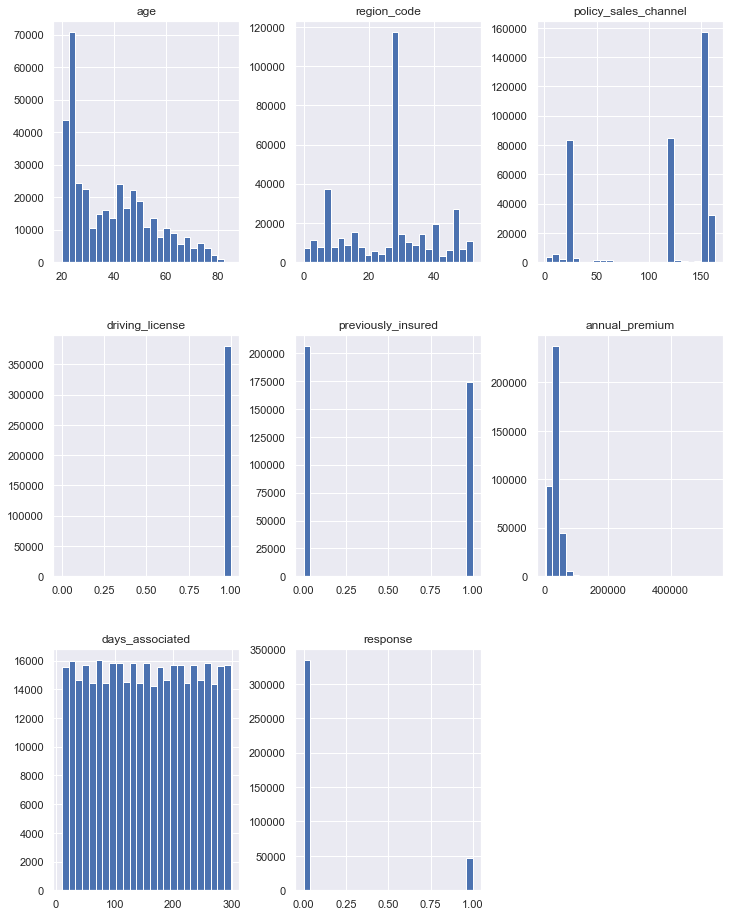

In [22]:
num_attributes.hist(bins=25, figsize=(12,16));

## 5.2 Análise Bivariada

In [23]:
table = [["H","Hipótese","Resposta"],
         ["H1","Mulheres sao mais propensas a adquirir o seguro saude","Falso" ],
         ["H2","Pessoas mais velhas sao mais propensas a adquirir o seguro saude","Falso" ],
         ["H3","Pessoas com carros mais velhos sao mais propensas a adquirir o seguro saude","Verdadeiro" ],
         ["H4","Pessoas com carros danificados sao mais propensas a adquirir o seguro saude","Verdadeiro" ],
         ["H5","Pessoas previamente asseguradas sao mais propensas a adquirir o seguro saude","Falso" ],
         ["H6","Pessoas que ganham mais sao mais propensas a adquirir o seguro saude","Falso" ],
         ["H7","H7 Pessoas a mais tempo associadas sao mais propensas a adquirir o seguro saude","Falso" ],
        ]
print(tabulate(table, tablefmt="github", headers="firstrow" , colalign=("center","center","center")))

|  H  |                                    Hipótese                                     |  Resposta  |
|-----|---------------------------------------------------------------------------------|------------|
| H1  |              Mulheres sao mais propensas a adquirir o seguro saude              |   Falso    |
| H2  |        Pessoas mais velhas sao mais propensas a adquirir o seguro saude         |   Falso    |
| H3  |   Pessoas com carros mais velhos sao mais propensas a adquirir o seguro saude   | Verdadeiro |
| H4  |   Pessoas com carros danificados sao mais propensas a adquirir o seguro saude   | Verdadeiro |
| H5  |  Pessoas previamente asseguradas sao mais propensas a adquirir o seguro saude   |   Falso    |
| H6  |      Pessoas que ganham mais sao mais propensas a adquirir o seguro saude       |   Falso    |
| H7  | H7 Pessoas a mais tempo associadas sao mais propensas a adquirir o seguro saude |   Falso    |


### 5.1 - H1 - Mulheres sao mais propensas a adquirir o seguro saude

Falso. Homens são mais propensos que mulheres

In [24]:
aux = df5.loc[:, ['gender','response']].groupby(by=['gender']).agg({'gender':'count','response':'sum'})
aux.columns = ['total','positive']
aux = aux.reset_index()
aux['percentual'] = aux['positive']/aux['total']
aux

,gender,total,positive,percentual
0,Female,175020,18185,0.103902
1,Male,206089,28525,0.138411


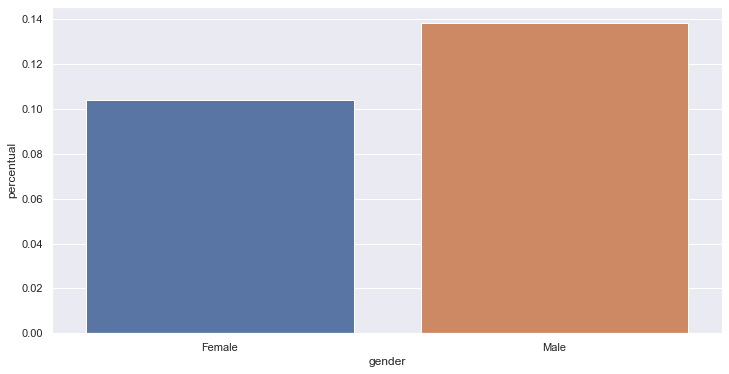

In [25]:
sns.barplot( x='gender',y='percentual', data = aux);

### 5.2 - H2 - Pessoas mais velhas sao mais propensas a adquirir o seguro saude

Falso. Pessoas de idade intermediaria são mais propensas a adquirir o seguro saude

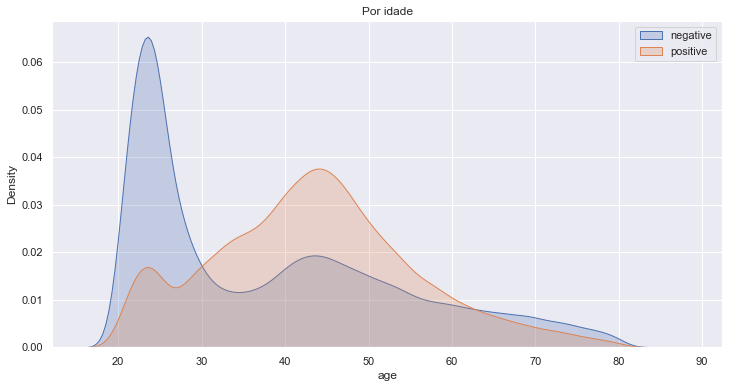

In [26]:
plt.subplot(1,1,1)
filter0 = (df5['response'] == 0)
filter1 = (df5['response'] == 1)

sns.kdeplot( df5.loc[filter0, 'age'], label='negative', fill=True )
sns.kdeplot( df5.loc[filter1, 'age'], label='positive', fill=True )
plt.legend()
plt.title('Por idade');

### 5.3 - H3 - Pessoas com carros mais velhos sao mais propensas a adquirir o seguro saude

Verdadeiro. Quanto mais velho o carro, mais propenso de adquirir o seguro saude.

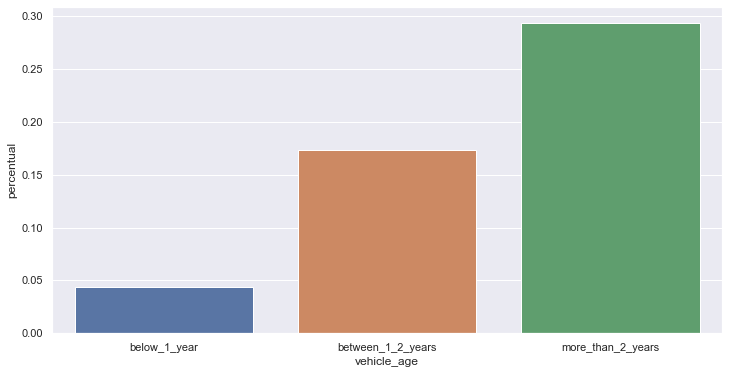

In [27]:
aux = df5.loc[:, ['vehicle_age','response']].groupby(by=['vehicle_age']).agg({'vehicle_age':'count','response':'sum'})
aux.columns = ['total','positive']
aux = aux.reset_index()
aux['percentual'] = aux['positive']/aux['total']

sns.barplot(data=aux, x='vehicle_age', y='percentual');

### 5.4 - H4 - Pessoas com carros danificados sao mais propensas a adquirir o seguro saude

Verdadeiro. Pessoas com carros danificados são mais propensas a adquirir o seguro saúde

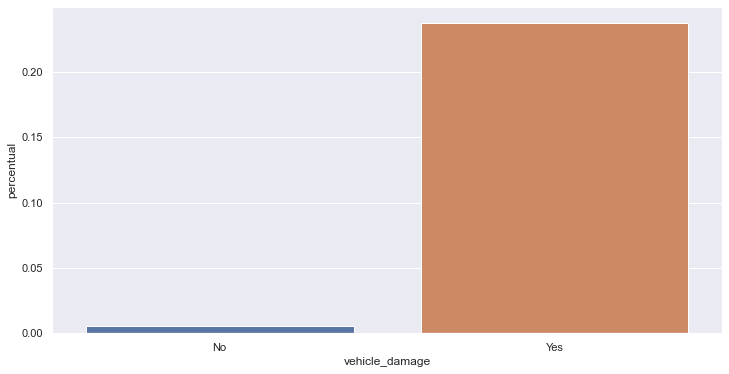

In [28]:
aux = df5.loc[:, ['vehicle_damage','response']].groupby(by=['vehicle_damage']).agg({'vehicle_damage':'count','response':'sum'})
aux.columns = ['total','positive']
aux = aux.reset_index()
aux['percentual'] = aux['positive']/aux['total']

sns.barplot(data=aux, x='vehicle_damage', y='percentual');

### 5.5 - H5 - Pessoas previamente asseguradas sao mais propensas a adquirir o seguro saude

Falso. Pessoas nunca asseguradas são as mais propensas a adquirir o seguro saude

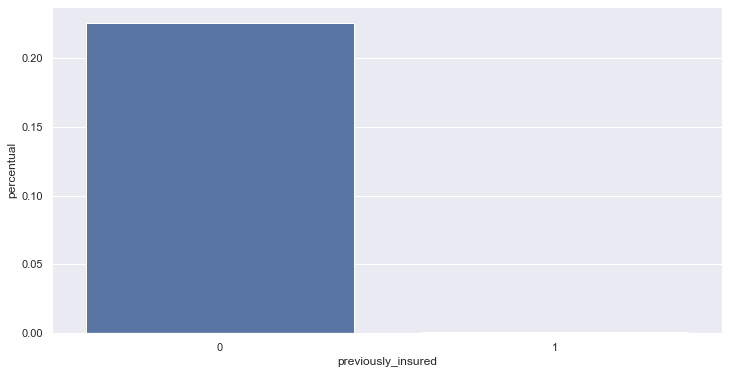

In [29]:
aux = df5.loc[:, ['previously_insured','response']].groupby(by=['previously_insured']).agg({'previously_insured':'count','response':'sum'})
aux.columns = ['total','positive']
aux = aux.reset_index()
aux['percentual'] = aux['positive']/aux['total']

sns.barplot(data=aux, x='previously_insured', y='percentual');

### 5.6 - H6 - Pessoas que ganham mais sao mais propensas a adquirir o seguro saude

Falso. Cancela da mesma maneira

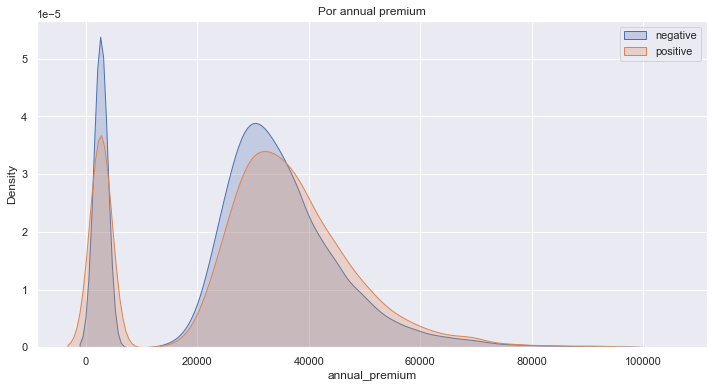

In [30]:
plt.subplot(1,1,1)
filter0 = (df5['response'] == 0) & (df5['annual_premium'] < 100000)
filter1 = (df5['response'] == 1) & (df5['annual_premium'] < 100000)

sns.kdeplot( df5.loc[filter0, 'annual_premium'], label='negative', fill=True )
sns.kdeplot( df5.loc[filter1, 'annual_premium'], label='positive', fill=True )
plt.legend()
plt.title('Por annual premium');

### 5.7 - H7 Pessoas a mais tempo associadas sao mais propensas a adquirir o seguro saude

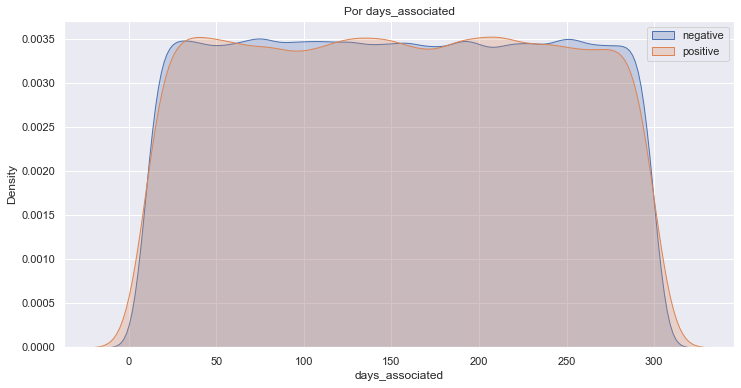

In [31]:
plt.subplot(1,1,1)
filter0 = (df5['response'] == 0)
filter1 = (df5['response'] == 1)

sns.kdeplot( df5.loc[filter0, 'days_associated'], label='negative', fill=True )
sns.kdeplot( df5.loc[filter1, 'days_associated'], label='positive', fill=True )
plt.legend()
plt.title('Por days_associated');

### 5.8 - H8 

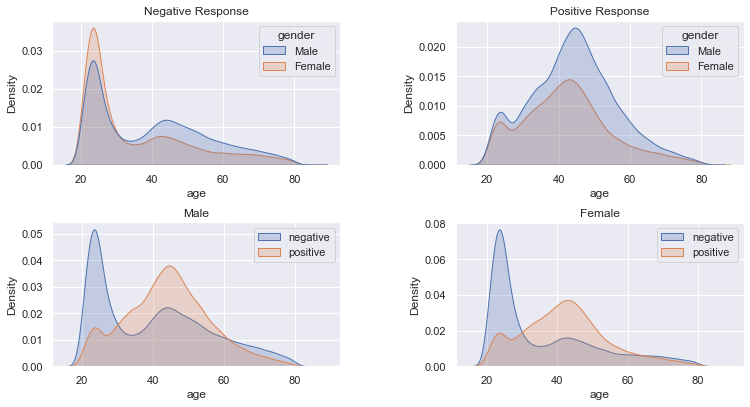

In [32]:
subplots_adjust()

plt.subplot(2,2,1)
sns.kdeplot( data=df5.loc[ df5['response'] == 0, ['gender', 'age']], x='age', hue='gender', fill=True, )
plt.title('Negative Response')

plt.subplot(2,2,2)
sns.kdeplot( data=df5.loc[ df5['response'] == 1, ['gender', 'age']], x='age', hue='gender', fill=True, )
plt.title('Positive Response')

plt.subplot(2,2,3)
filter0 = (df5['gender'] == 'Male') & (df5['response'] == 0)
filter1 = (df5['gender'] == 'Male') & (df5['response'] == 1)

sns.kdeplot( df5.loc[filter0, 'age'], label='negative', fill=True )
sns.kdeplot( df5.loc[filter1, 'age'], label='positive', fill=True )
plt.legend()
plt.title('Male')

plt.subplot(2,2,4)
filter0 = (df5['gender'] == 'Female') & (df5['response'] == 0)
filter1 = (df5['gender'] == 'Female') & (df5['response'] == 1)

sns.kdeplot( df5.loc[filter0, 'age'], label='negative', fill=True )
sns.kdeplot( df5.loc[filter1, 'age'], label='positive', fill=True )
plt.legend()
plt.title('Female');

## 5.3 Análise multivariada

### 5.3.1 Numerical Attributes


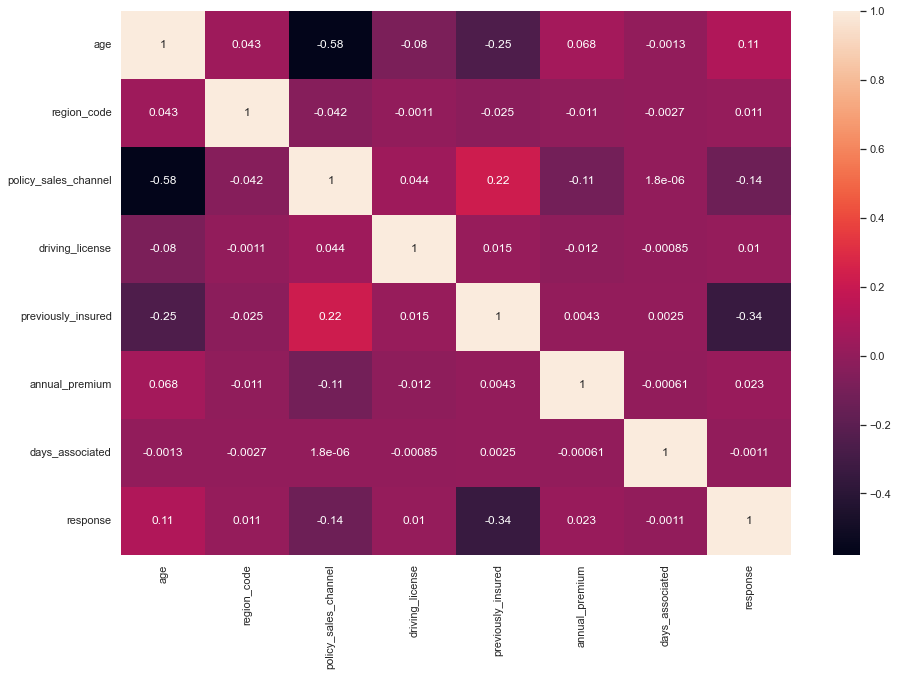

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))

correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

# 6.0 Data Preparation

In [34]:
df6 = df5.copy()

## 6.2 Transformação

In [35]:
df6

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,days_associated,response
0,1,Male,44,28,26,1,more_than_2_years,Yes,0,40454.0,217,1
1,2,Male,76,3,26,1,between_1_2_years,No,0,33536.0,183,0
2,3,Male,47,28,26,1,more_than_2_years,Yes,0,38294.0,27,1
3,4,Male,21,11,152,1,below_1_year,No,1,28619.0,203,0
4,5,Female,29,41,152,1,below_1_year,No,1,27496.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,26,26,1,between_1_2_years,No,1,30170.0,88,0
381105,381106,Male,30,37,152,1,below_1_year,No,1,40016.0,131,0
381106,381107,Male,21,30,160,1,below_1_year,No,1,35118.0,161,0
381107,381108,Female,68,14,124,1,more_than_2_years,Yes,0,44617.0,74,0


In [36]:
# One Hot Encoding
df6['vehicle_damage'] = df6['vehicle_damage'].apply(lambda x: 1 if x=='Yes' else 0)
df6['gender'] = df6['gender'].apply(lambda x: 1 if x=='Male' else 0)

# Target Encoding
vehicle_age_encoding = {'below_1_year':1, 'between_1_2_years':2, 'more_than_2_years':3}
df6['vehicle_age'] = df6['vehicle_age'].map(vehicle_age_encoding)

region_code_encoding = df6.groupby('region_code')['response'].mean()
df6['region_code'] = df6['region_code'].map(region_code_encoding)

policy_sales_channel_encoding = df6.groupby('policy_sales_channel')['response'].mean()
df6['policy_sales_channel'] = df6['policy_sales_channel'].map(policy_sales_channel_encoding)

In [37]:
# mms = MinMaxScaler()

# df6['annual_premium']       = mms.fit_transform(df6[['annual_premium']].values)
# df6['days_associated']      = mms.fit_transform(df6[['days_associated']].values)
# df6['age']                  = mms.fit_transform(df6[['age']].values)
# df6['policy_sales_channel'] = mms.fit_transform(df6[['policy_sales_channel']].values)
# df6['region_code']          = mms.fit_transform(df6[['region_code']].values)

In [38]:
ss = StandardScaler()

df6['annual_premium']       = ss.fit_transform(df6[['annual_premium']].values)
df6['days_associated']      = ss.fit_transform(df6[['days_associated']].values)
df6['age']                  = ss.fit_transform(df6[['age']].values)
df6['policy_sales_channel'] = ss.fit_transform(df6[['policy_sales_channel']].values)
df6['region_code']          = ss.fit_transform(df6[['region_code']].values)

In [39]:
df6

,id,gender,age,region_code,policy_sales_channel,driving_license,vehicle_age,vehicle_damage,previously_insured,annual_premium,days_associated,response
0,1,1,0.333777,1.426484,0.889268,1,3,1,0,0.574539,0.748795,1
1,2,1,2.396751,0.112584,0.889268,1,2,0,0,0.172636,0.342443,0
2,3,1,0.527181,1.426484,0.889268,1,3,1,0,0.449053,-1.521998,1
3,4,1,-1.148985,-0.216476,-1.087420,1,1,0,1,-0.113018,0.581474,0
4,5,0,-0.633242,-0.017380,-1.087420,1,1,0,1,-0.178259,-1.378580,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,2.267815,-1.110246,0.889268,1,2,0,1,-0.022912,-0.792954,0
381105,381106,1,-0.568774,-0.956251,-1.087420,1,1,0,1,0.549093,-0.279037,0
381106,381107,1,-1.148985,-1.076230,-1.166292,1,1,0,1,0.264543,0.079509,0
381107,381108,0,1.881007,-0.714430,0.770764,1,3,1,0,0.816389,-0.960275,0


# 7.0 Feature Selection

In [40]:
df7 = df6.copy()

# 8.0. Machine Learning Model

In [41]:
df8 = df6.copy()

X = df8.drop(columns=['id','response'])
y = df8['response']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 8.1. Linear Regression

,model,Acurácia,Precisão,Recall,f1_score,k,recall_at_k
0,Regressão Linear,0.87612,0.402062,0.00663,0.013045,0.4,0.918317


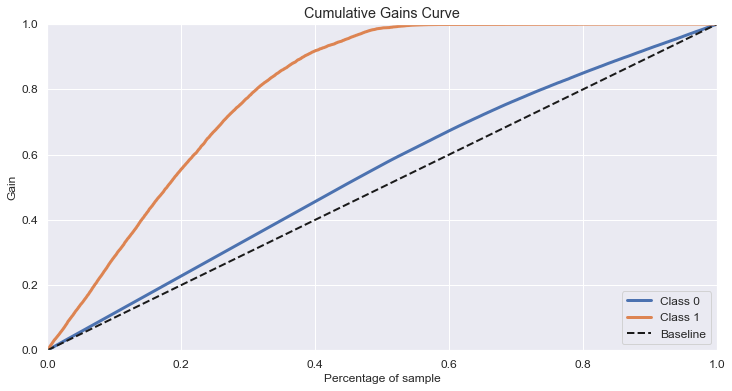

In [151]:
# Linear Regression
lr = LogisticRegression( max_iter=1000 )

# Training the Model
lr.fit(X_train, y_train)

# Predicting
y_predict = lr.predict( X_test )
yhat_proba = lr.predict_proba( X_test )

# Showing the metrics
recall_at_k,accuracy_score,precision_score,recall_score,f1_score = metrics(X_test, y_test, yhat_proba, y_predict, k=0.4)

# Aggregating the results in a dataframe
lr_results = {'model':['Regressão Linear'], 'Acurácia': [accuracy_score], 'Precisão':[precision_score], 'Recall': [recall_score], 'f1_score':[f1_score], 'k': [0.4], 'recall_at_k': [recall_at_k]}
df_lr = pd.DataFrame(lr_results)
df_lr

2.2957444147439556

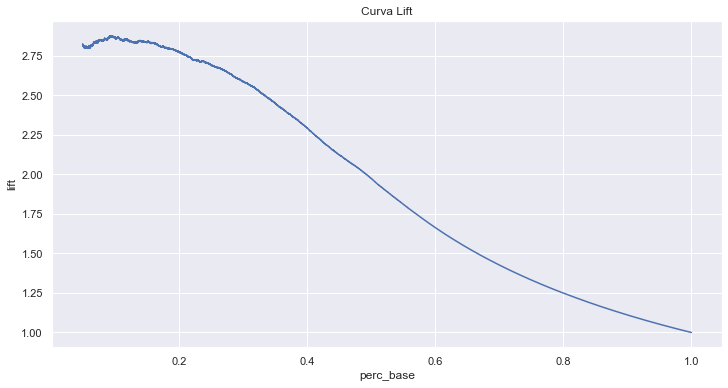

In [152]:
lift_curve(y_test, yhat_proba)

## 8.2. XGBoost Classifier

,model,Acurácia,Precisão,Recall,f1_score,k,recall_at_k
0,XGBoost Classifier,0.876981,0.55641,0.018445,0.035705,0.4,0.929537


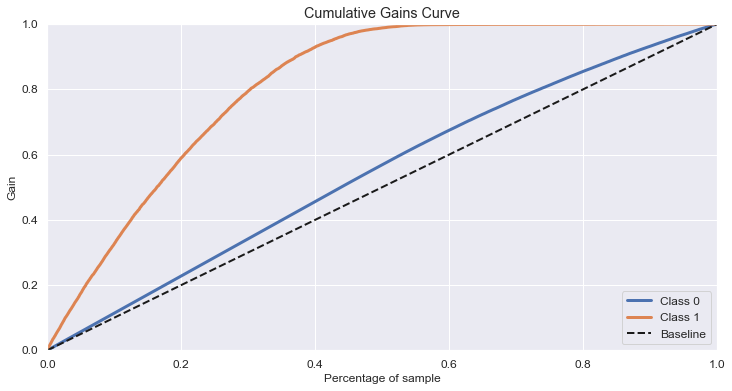

In [43]:
# XGBoost Classifier Model
xgb_model = xgb.XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=100)

# Treinando o modelo
xgb_model.fit(X_train, y_train)

# Realizando as previsões
y_predict_xgb = xgb_model.predict( X_test )
yhat_proba_xgb = xgb_model.predict_proba(X_test)

# Métricas do modelo
recall_at_k,accuracy_score,precision_score,recall_score,f1_score = metrics(X_test, y_test, yhat_proba_xgb, y_predict_xgb, k=0.4)

# Registrando os resultados em um dataframe
xgb_results = {'model':['XGBoost Classifier'], 'Acurácia': [accuracy_score], 'Precisão':[precision_score], 'Recall': [recall_score], 'f1_score':[f1_score], 'k': [0.4], 'recall_at_k': [recall_at_k]}
df_xgb = pd.DataFrame(xgb_results)
df_xgb

2.323793124735274

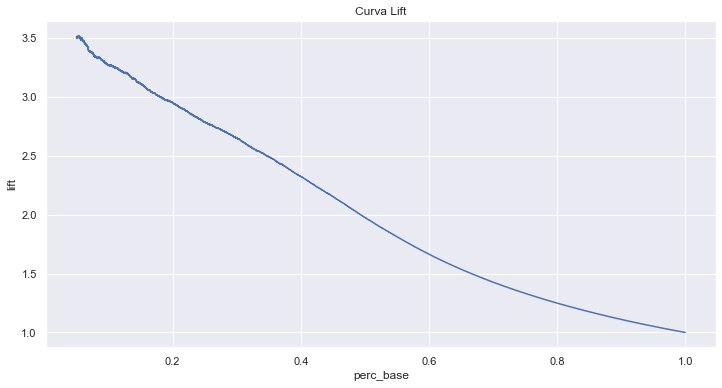

In [162]:
lift_curve(y_test, yhat_proba_xgb)

## 8.3. Gradient Boosting Classifier

,model,Acurácia,Precisão,Recall,f1_score,k,recall_at_k
0,Gradient Boosting Classifier,0.876645,0.596774,0.003145,0.006257,0.4,0.930472


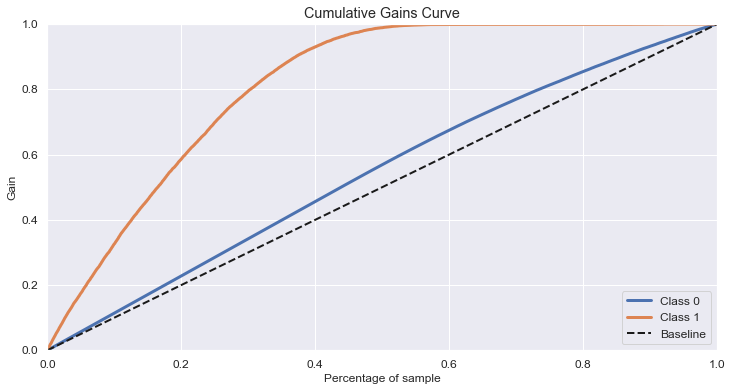

In [44]:
# Gradient Boost Classifier Model
gbrt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=3, max_depth=5, random_state=42)

# Treinando o modelo
gbrt.fit(X_train, y_train)

# Realizando as previsões
y_predict_gbc  = gbrt.predict(X_test)
yhat_proba_gbc = gbrt.predict_proba(X_test)

# Métricas do modelo
recall_at_k,accuracy_score,precision_score,recall_score,f1_score = metrics(X_test, y_test, yhat_proba_gbc, y_predict_gbc, k=0.4)

# Registrando os resultados em um dataframe
gbrt_results = {'model':['Gradient Boosting Classifier'], 'Acurácia': [accuracy_score], 'Precisão':[precision_score], 'Recall': [recall_score], 'f1_score':[f1_score], 'k': [0.4], 'recall_at_k': [recall_at_k]}
df_gbrt = pd.DataFrame(gbrt_results)
df_gbrt

2.3261305172345503

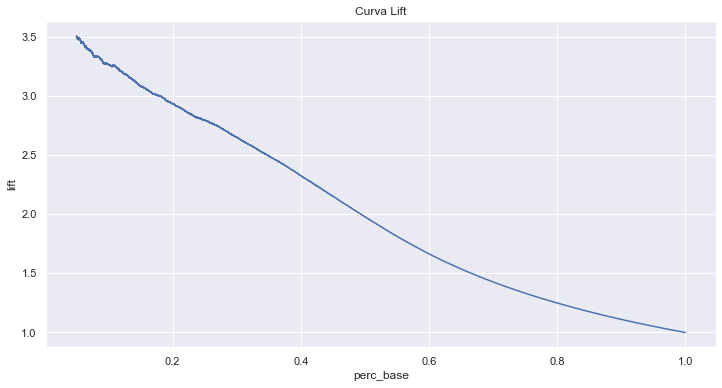

In [161]:
lift_curve(y_test, yhat_proba_gbc)

## 8.4. KNN

,model,Acurácia,Precisão,Recall,f1_score,k,recall_at_k
0,K-Nearest Neighbors,0.876267,0.454887,0.010285,0.020115,0.4,0.917127


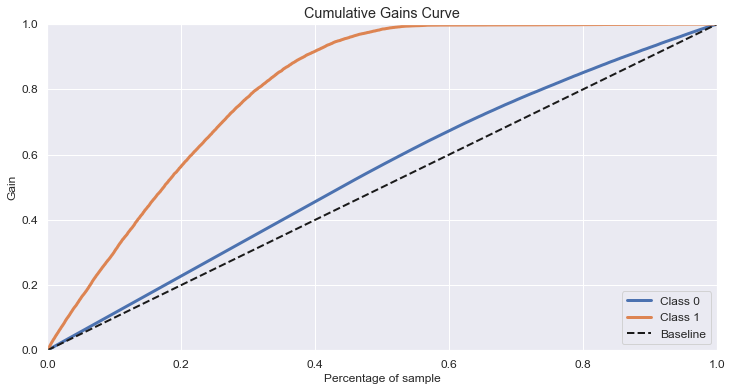

In [45]:
# K-Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=75)

# Treinando o modelo
knn.fit(X_train, y_train)

# Realizando as previsões
y_predict_knn  = knn.predict(X_test)
yhat_proba_knn = knn.predict_proba(X_test)

# Métricas do modelo
recall_at_k,accuracy_score,precision_score,recall_score,f1_score = metrics(X_test, y_test, yhat_proba_knn, y_predict_knn, k=0.4)

# Registrando os resultados em um dataframe
knn_results = {'model':['K-Nearest Neighbors'], 'Acurácia': [accuracy_score], 'Precisão':[precision_score], 'Recall': [recall_score], 'f1_score':[f1_score], 'k': [0.4], 'recall_at_k': [recall_at_k]}
df_knn = pd.DataFrame(knn_results)
df_knn

In [159]:
lift_curve(y_test, yhat_proba_knn)

NameError: name 'df_prob' is not defined

## 8.5. Comparing Models

In [153]:
models_results = pd.concat([df_lr, df_xgb,df_gbrt,df_knn], axis=0)
models_results.sort_values(by='recall_at_k', ascending=False)

,model,Acurácia,Precisão,Recall,f1_score,k,recall_at_k
0,Gradient Boosting Classifier,0.876645,0.596774,0.003145,0.006257,0.4,0.930472
1,XGBoost Classifier,0.876981,0.556410,0.018445,0.035705,0.4,0.929537
2,Regressão Linear,0.876120,0.402062,0.006630,0.013045,0.4,0.918317
3,K-Nearest Neighbors,0.876267,0.454887,0.010285,0.020115,0.4,0.917127


In [53]:
# Lift Curve

# é a divisão da % que meu modelo capturou de verdadeiro positivo pela divisão de quanto um modelo aleatório teria capturado

In [160]:
def lift_curve(y_test, yhat_proba):
    # Criando dataframe vazio
    lift = pd.DataFrame()

    # Construindo o dataframe para a curva Lift
    lift['y_test']    = y_test
    lift['y_proba_1']   = yhat_proba[:, 1]
    lift = lift.sort_values(by='y_proba_1', ascending=False)
    lift = lift.reset_index(drop=True)
    lift['ranking'] = lift.index+1
    lift['perc_base'] = lift['ranking'] / lift['ranking'].max()
    lift['propensity_score'] = lift['y_test'].cumsum() / lift['y_test'].sum()
    lift['lift'] = lift['propensity_score']/lift['perc_base']

    # Coletando os dados para a curva Lift
    x = lift.loc[lift['perc_base']>0.05,'perc_base']
    y = lift.loc[lift['perc_base']>0.05,'lift']

    # Salvando
    lift_improve = lift.iloc[int(len(lift) * 0.4), 5]

    # Plotando no gráfico a curva Lift
    sns.lineplot(x=x, y=y)
    plt.title('Curva Lift');
    
    return lift_improve

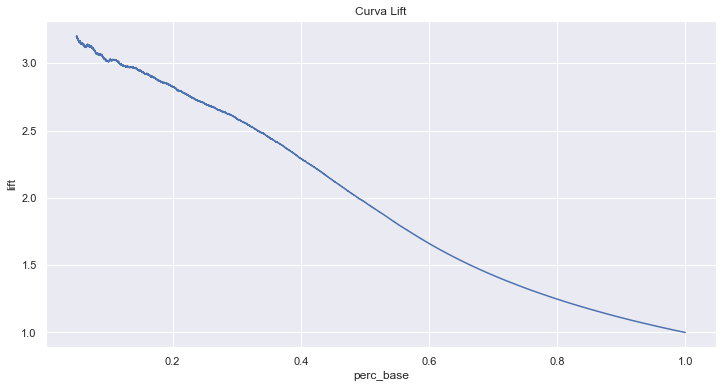

In [149]:
# Criando dataframe vazio
lift = pd.DataFrame()

# Construindo o dataframe para a curva Lift
lift['y_test']    = y_test
lift['y_proba_1']   = yhat_proba_knn[:, 1]
lift = lift.sort_values(by='y_proba_1', ascending=False)
lift = lift.reset_index(drop=True)
lift['ranking'] = lift.index+1
lift['perc_base'] = lift['ranking'] / lift['ranking'].max()
lift['propensity_score'] = lift['y_test'].cumsum() / lift['y_test'].sum()
lift['lift'] = lift['propensity_score']/lift['perc_base']

# Coletando os dados para a curva Lift
x = lift.loc[lift['perc_base']>0.05,'perc_base']
y = lift.loc[lift['perc_base']>0.05,'lift']

# Salvando
lift_improve = lift.iloc[38111, 5]

# Plotando no gráfico a curva Lift
sns.lineplot(x=x, y=y)
plt.title('Curva Lift');

In [148]:
lift.loc[lift['perc_base']>0.400008, 'lift']

38111    2.292770
38112    2.292709
38113    2.292649
38114    2.292802
38115    2.292741
           ...   
95273    1.000042
95274    1.000031
95275    1.000021
95276    1.000010
95277    1.000000
Name: lift, Length: 57167, dtype: float64

# 9.0 Deployment

In [47]:
class HealthInsurance:
    def __init__( self ):
        self.home_path=''
        self.home=''
        
    def data_cleaning( df2 ):
    
    df2 = df2.rename(columns = {'vintage':'days_associated'})
    
    return df2

    def feature_engineering( df3 ):
        # changing the categories in 'vehicle_age' column
        vehicle_age_dict = {'< 1 Year':'below_1_year', '1-2 Year':'between_1_2_years', '> 2 Years':'more_than_2_years'}
        df3['vehicle_age'] = df3['vehicle_age'].map(vehicle_age_dict)
        
        return df3

    def data_preparation( df4 ):
        # One Hot Encoding
        df6['vehicle_damage'] = df6['vehicle_damage'].apply(lambda x: 1 if x=='Yes' else 0)
        df6['gender'] = df6['gender'].apply(lambda x: 1 if x=='Male' else 0)

        # Target Encoding
        vehicle_age_encoding = {'below_1_year':1, 'between_1_2_years':2, 'more_than_2_years':3}
        df6['vehicle_age'] = df6['vehicle_age'].map(vehicle_age_encoding)

        region_code_encoding = df6.groupby('region_code')['response'].mean()
        df6['region_code'] = df6['region_code'].map(region_code_encoding)

        policy_sales_channel_encoding = df6.groupby('policy_sales_channel')['response'].mean()
        df6['policy_sales_channel'] = df6['policy_sales_channel'].map(policy_sales_channel_encoding) 

        return df4

IndentationError: expected an indented block (Temp/ipykernel_9556/2325241986.py, line 8)